Importing required libraries as we need them in out project

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/Churn_Modelling (1).csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

Our data has 10,000 rows and 14 columns where exited is the target columns

In [5]:
df.duplicated().sum()

0

Since there are no duplicate entries (rows) we will continue else we would have deleted them

We will now see how many customers are male and how many are female

In [6]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

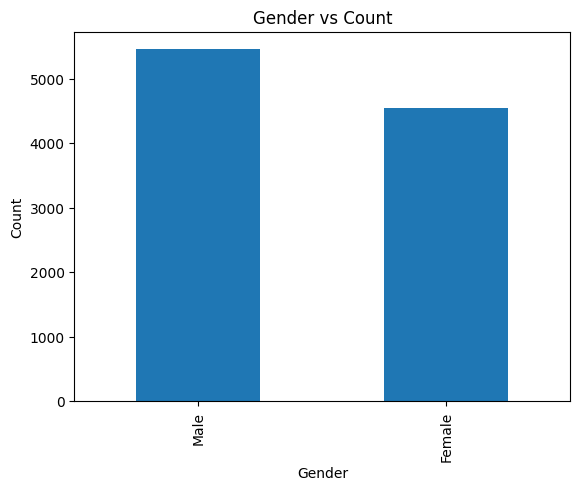

In [7]:
import matplotlib.pyplot as plt

df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Count')
plt.show()


In [8]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Since some columns are not relavent for the prediction purpose we will drop(exclude) them from our dataframe

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.shape

(10000, 11)

We can see geography and gender are categorical data we will convert these two categorical variables into dummy variables using get_dummies function

In [13]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


Since the data is clean now , we can approach for splitting it into train and test data

In [16]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [18]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [20]:
x_train.shape

(8000, 11)

In [21]:
x_test.shape

(2000, 11)

In [22]:
y_train.shape

(8000,)

In [23]:
y_test.shape

(2000,)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we are scaling the data so that our model perfoms better
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
x_test_scaled[3]

array([-1.51194691, -0.27795042, -1.03695677,  0.05790073, -0.91047925,
       -1.55196866,  0.96559161,  1.29379845, -0.5821616 , -0.57600312,
       -1.0983114 ])

In [26]:
x_train_scaled

array([[-1.11833347, -0.84839766, -0.34588261, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [ 0.17644758,  0.67279499, -1.72803092, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [ 1.20191418, -0.37302496,  0.34519154, ...,  1.71773609,
        -0.57600312, -1.0983114 ],
       ...,
       [ 0.36289605, -0.4680995 , -0.69141969, ..., -0.5821616 ,
        -0.57600312, -1.0983114 ],
       [-0.14465812,  0.19742228, -1.03695677, ..., -0.5821616 ,
        -0.57600312,  0.9104886 ],
       [-0.38289783, -0.84839766, -0.69141969, ...,  1.71773609,
        -0.57600312, -1.0983114 ]])

In [27]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [28]:
model = Sequential()

In [29]:
x_train_scaled.shape

(8000, 11)

In [30]:
model.add(Dense(11,activation = "relu",input_dim = 11))
model.add(Dense(11,activation = "relu"))
model.add(Dense(1,activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])

In [33]:
history = model.fit(x_train_scaled,y_train,epochs = 50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.7124 - accuracy: 0.5383 - val_loss: 0.5657 - val_accuracy: 0.7850
Epoch 2/50
200/200 [==============================] - 2s 10ms/step - loss: 0.5052 - accuracy: 0.7969 - val_loss: 0.4859 - val_accuracy: 0.7862
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.4442 - accuracy: 0.8019 - val_loss: 0.4525 - val_accuracy: 0.7975
Epoch 4/50
200/200 [==============================] - 1s 6ms/step - loss: 0.4191 - accuracy: 0.8125 - val_loss: 0.4423 - val_accuracy: 0.8006
Epoch 5/50
200/200 [==============================] - 1s 7ms/step - loss: 0.4069 - accuracy: 0.8178 - val_loss: 0.4350 - val_accuracy: 0.8081
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3968 - accuracy: 0.8250 - val_loss: 0.4309 - val_accuracy: 0.8169
Epoch 7/50
200/200 [==============================] - 1s 6ms/step - loss: 0.3875 - accuracy: 0.8322 - val_loss: 0.4185 - val_accuracy: 0.8238
Epoch

In [34]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [35]:
y_log

array([[0.26006895],
       [0.03347262],
       [0.03915407],
       ...,
       [0.3027345 ],
       [0.9995116 ],
       [0.02465444]], dtype=float32)

In our data the exited coulumn had only 0 or 1 but our model is giving us a predicted value between 0 to 1 , therefore if value is more than 0.5 we will consider it as 1 else 0

In [36]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)

In [37]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_pred,y_test)

0.865

The prediction part is done , now we will try to see how our model is working in each epochs whether there is some underfitting or overfitting by plotting some graphs .

In [40]:
import matplotlib.pyplot as plt

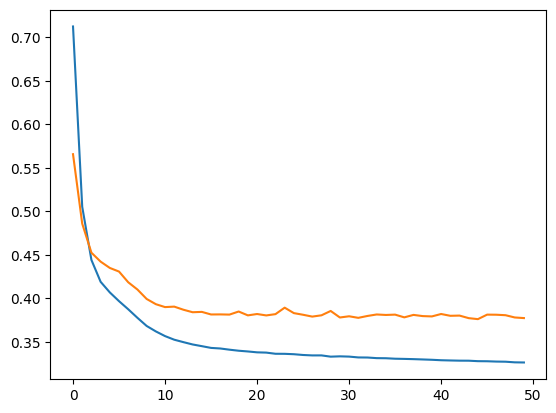

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

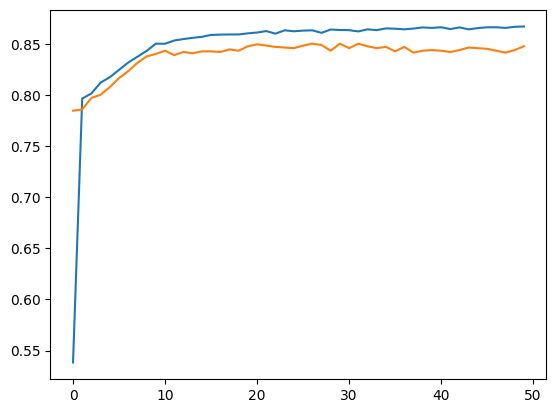

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

Experimenting with a more complex neural network:

In [44]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# Defining the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=11))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Training the model
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=128, validation_split=0.2)

# Evaluating the model on test data
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test accuracy: {accuracy}')


Epoch 1/50
50/50 [==============================] - 2s 7ms/step - loss: 0.5372 - accuracy: 0.7784 - val_loss: 0.4845 - val_accuracy: 0.7862
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.8008 - val_loss: 0.4512 - val_accuracy: 0.8006
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.8061 - val_loss: 0.4406 - val_accuracy: 0.8075
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.8094 - val_loss: 0.4361 - val_accuracy: 0.8175
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4236 - accuracy: 0.8166 - val_loss: 0.4304 - val_accuracy: 0.8188
Epoch 6/50
50/50 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8188 - val_loss: 0.4263 - val_accuracy: 0.8225
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4159 - accuracy: 0.8231 - val_loss: 0.4216 - val_accuracy: 0.8269
Epoch 8/50
50/50 [==